In [1]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
import matplotlib.pyplot as plt

%matplotlib inline

from IPython.core.display import Image, display
display(Image(filename='images/nn.jpg'))

/Users/mojtabahaghighatlari/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
X = pd.read_csv('../data/molorg_features.csv',header = 0)
# remove constant columns (check previous notebook)
X = X.loc[:, (X != X.iloc[0]).any()]
# select a smaller number of features
X = X.iloc[:,0:50]
print X.shape

y = pd.read_csv('../data/molorg_pol.csv', header = 0)
print y.shape


(1000, 50)
(1000, 1)


/Users/mojtabahaghighatlari/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:1266: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mojtabahaghighatlari/anaconda/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:563: ConvergenceWarning: Stochastic Optimizer: Maximum iterations reached and the optimization hasn't converged yet.
  % (), ConvergenceWarning)


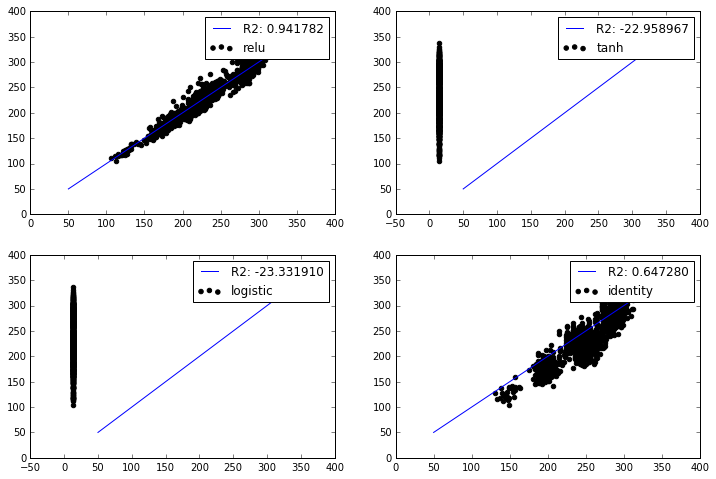

In [3]:
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu')
mlpr.fit(X,y)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh')
mlpt.fit(X,y)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic')
mlpl.fit(X,y)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity')
mlpi.fit(X,y)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([50,350],[50,350], label='R2: %f'%mlpr.score(X,y))
plt.scatter(mlpr.predict(X),y, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([50,350],[50,350], label='R2: %f'%mlpt.score(X,y))
plt.scatter(mlpt.predict(X),y, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([50,350],[50,350], label='R2: %f'%mlpl.score(X,y))
plt.scatter(mlpl.predict(X),y, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([50,350],[50,350], label='R2: %f'%mlpi.score(X,y))
plt.scatter(mlpi.predict(X),y, c='k', label='identity')
plt.legend()




In [4]:
print '# negative X:', (X<0).any().sum()
print 'maximum min of all features:', X.min().max()

# negative X: 0
maximum min of all features: 174.21


In [5]:
(y<0).any().sum()

0

A list of activation functions:
https://en.wikipedia.org/wiki/Activation_function

- range of inputs and outputs
- derivative at different input values

## Impact of Scaling 

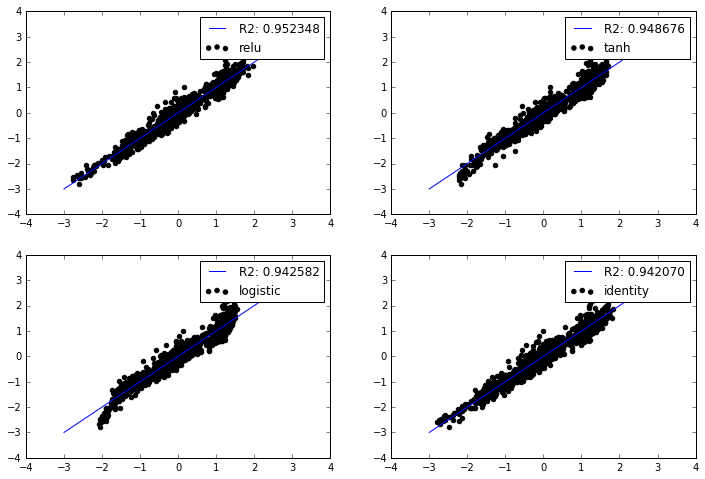

In [6]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y)



mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu')
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh')
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic')
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity')
mlpi.fit(Xscaled,yscaled)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()

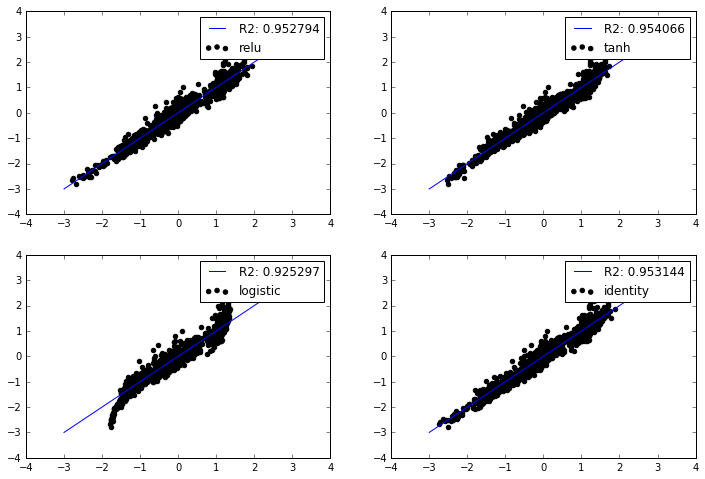

In [7]:
from sklearn import preprocessing

scalerSS = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True)
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y)



mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', alpha = 1)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', alpha = 1)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', alpha = 1)
mlpi.fit(Xscaled,yscaled)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([-3,3],[-3,3], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()

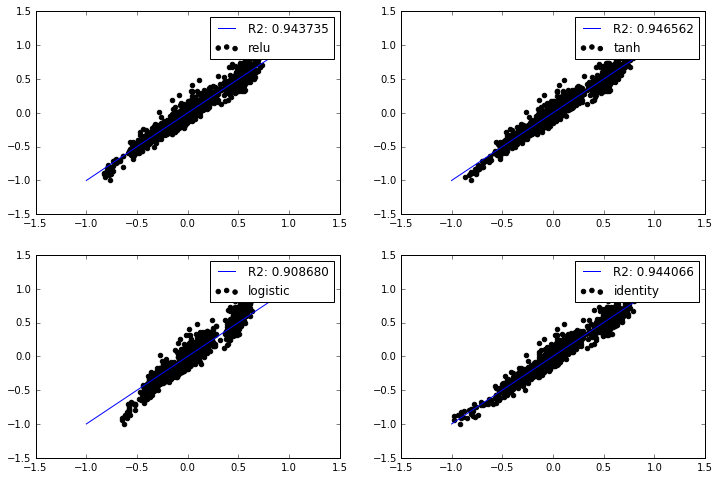

In [15]:
scalerMM = preprocessing.MinMaxScaler((-1,1))
Xscaled = scalerMM.fit_transform(X)
yscaled = scalerMM.fit_transform(y)



mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1)
mlpr.fit(Xscaled,yscaled)

mlpt = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'tanh', alpha = 1)
mlpt.fit(Xscaled,yscaled)

mlpl = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'logistic', alpha = 1)
mlpl.fit(Xscaled,yscaled)

mlpi = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'identity', alpha = 1)
mlpi.fit(Xscaled,yscaled)


# plot the fitted lines
fig = plt.figure(figsize=[12,8])
plt.subplot(2,2,1)
plt.plot([-1,1],[-1,1], label='R2: %f'%mlpr.score(Xscaled,yscaled))
plt.scatter(mlpr.predict(Xscaled),yscaled, c='k', label='relu')
plt.legend()
plt.subplot(2,2,2)
plt.plot([-1,1],[-1,1], label='R2: %f'%mlpt.score(Xscaled,yscaled))
plt.scatter(mlpt.predict(Xscaled),yscaled, c='k', label='tanh')
plt.legend()
plt.subplot(2,2,3)
plt.plot([-1,1],[-1,1], label='R2: %f'%mlpl.score(Xscaled,yscaled))
plt.scatter(mlpl.predict(Xscaled),yscaled, c='k', label='logistic')
plt.legend()
plt.subplot(2,2,4)
plt.plot([-1,1],[-1,1], label='R2: %f'%mlpi.score(Xscaled,yscaled))
plt.scatter(mlpi.predict(Xscaled),yscaled, c='k', label='identity')
plt.legend()

## Impact of early stopping

In [16]:
Xscaled = scalerSS.fit_transform(X)
yscaled = scalerSS.fit_transform(y)

mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, verbose = 1)
mlpr.fit(Xscaled,yscaled)

print mlpr.score(Xscaled,yscaled)



Iteration 1, loss = 1.08450832
Iteration 2, loss = 0.66034989
Iteration 3, loss = 0.38490902
Iteration 4, loss = 0.25061606
Iteration 5, loss = 0.20286100
Iteration 6, loss = 0.20189282
Iteration 7, loss = 0.20266532
Iteration 8, loss = 0.19183357
Iteration 9, loss = 0.17933842
Iteration 10, loss = 0.17278642
Iteration 11, loss = 0.16861963
Iteration 12, loss = 0.16608828
Iteration 13, loss = 0.16280517
Iteration 14, loss = 0.15930717
Iteration 15, loss = 0.15676338
Iteration 16, loss = 0.15455062
Iteration 17, loss = 0.15280011
Iteration 18, loss = 0.15113467
Iteration 19, loss = 0.14952546
Iteration 20, loss = 0.14819183
Iteration 21, loss = 0.14692137
Iteration 22, loss = 0.14568115
Iteration 23, loss = 0.14442936
Iteration 24, loss = 0.14321974
Iteration 25, loss = 0.14210482
Iteration 26, loss = 0.14105271
Iteration 27, loss = 0.14003649
Iteration 28, loss = 0.13908484
Iteration 29, loss = 0.13806661
Iteration 30, loss = 0.13715248
Iteration 31, loss = 0.13630460
Iteration 32, los

In [11]:
# with early_stopping
mlpr = MLPRegressor(hidden_layer_sizes = (20,10), activation= 'relu', alpha = 1, verbose = 1, early_stopping=True)
mlpr.fit(Xscaled,yscaled)

print mlpr.score(Xscaled,yscaled)




Iteration 1, loss = 1.51633730
Validation score: -1.141832
Iteration 2, loss = 1.04301716
Validation score: -0.334938
Iteration 3, loss = 0.68371894
Validation score: 0.238326
Iteration 4, loss = 0.43632057
Validation score: 0.575707
Iteration 5, loss = 0.29242411
Validation score: 0.717893
Iteration 6, loss = 0.22775191
Validation score: 0.725855
Iteration 7, loss = 0.22233444
Validation score: 0.698736
Iteration 8, loss = 0.22468238
Validation score: 0.712676
Iteration 9, loss = 0.21375640
Validation score: 0.755999
Iteration 10, loss = 0.19867948
Validation score: 0.787279
Iteration 11, loss = 0.19132173
Validation score: 0.803282
Iteration 12, loss = 0.18769707
Validation score: 0.811686
Iteration 13, loss = 0.18480380
Validation score: 0.818009
Iteration 14, loss = 0.18107553
Validation score: 0.824028
Iteration 15, loss = 0.17767840
Validation score: 0.829215
Iteration 16, loss = 0.17503724
Validation score: 0.833825
Iteration 17, loss = 0.17260845
Validation score: 0.838933
Iter